masih ada duplikat di bulan 11/12

In [2]:
import utils
import pandas as pd
import calendar
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# 1
# open files
arr = utils.fileList("rsc/")
arr.sort()
lists = list()
unused_columns = ['nilai_kerugian',
'jumlah_tempat_pengungsian',
'jumlah_pengungsi_tertinggi',
'jumlah_luka_ringan',
'jumlah_luka_berat',
'jumlah_hilang',
'jumlah_meninggal',
'lama_genangan',
'ketinggian_air',
'jumlah_terdampak_jiwa',
'jumlah_terdampak_kk',
'jumlah_terdampak_rw',
'jumlah_terdampak_rt',
'rw']
for item in arr:
    csv = utils.readCsv("rsc/" + item)
    for unused in unused_columns:
        csv.drop(unused, axis=1, inplace=True)
    csv.drop_duplicates(subset=None, keep='first', inplace=False)
    lists.append(csv)

In [5]:
# 2
print(lists[0].columns)

Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'tanggal_kejadian'], dtype='object')


In [6]:
# 3
nama_benahan = ["PULOGADUNG", "CILIINCING", "MAMPANG"]
for bulan in lists:
    for i in range(len(nama_benahan)):
        if i == 0:
            bulan.loc[bulan['kecamatan'] == nama_benahan[i], 'kecamatan'] = "PULO GADUNG"
        elif i == 1:
            bulan.loc[bulan['kecamatan'] == nama_benahan[i], 'kecamatan'] = "CILINCING"
        elif i == 2:
            bulan.loc[bulan['kecamatan'] == nama_benahan[i], 'kecamatan'] = "MAMPANG PRAPATAN"

In [7]:
# 4
loc = [10,11]
for l in loc:
    rows = lists[l]['tanggal_kejadian']
    # print(type(rows), l)
    for row in rows:
        # print(type(row))
        # print(row)
        if "-" in row:
            # if isinstance(row, str):
            #     dd = row[-2:]
            # else:
            #     dd = row[-2:].copy()

            dd = str(row[-2:])
            # print(dd, type(dd))
            lists[l].loc[lists[l]['tanggal_kejadian'] == row, 'tanggal_kejadian'] = dd
        

In [8]:
# 5
# normalize table in tanggal_kejadian column
data_normaliasi_tanggal = list()
# re.search(r'[0-9]{2}, txt')

def ubah_format(kata : str) -> str:
    if len(kata) == 1:
        return "0"+kata
    else:
        return kata



for bulan in lists:
    bulan['tanggal_kejadian'] = bulan['tanggal_kejadian'].str.split(',')
    bulan = bulan.explode('tanggal_kejadian').reset_index(drop=True)
    bulan['tanggal_kejadian'] = bulan['tanggal_kejadian'].apply(lambda kalimat: kalimat.replace("tgl. ", ""))
    bulan['tanggal_kejadian'] = bulan['tanggal_kejadian'].apply(lambda kalimat: kalimat.lstrip()[:2])
    bulan['tanggal_kejadian'] = bulan['tanggal_kejadian'].apply(lambda kalimat: ubah_format(kalimat))

    

    # bulan['tanggal_kejadian'] = bulan['tanggal_kejadian'].apply(lambda kalimat: kalimat.ljust(2, '0'))
    # bulan['tanggal_kejadian'] = bulan['tanggal_kejadian'].apply(lambda kalimat.string(): re.search(r'[0-9]{2}', kalimat))
    # bulan['tanggal_kejadian'] = bulan['tanggal_kejadian'].str.extract('(\d+)', expand=False)
    data_normaliasi_tanggal.append(bulan)


In [9]:
for bulan in data_normaliasi_tanggal:
    bulan.drop_duplicates()

In [10]:
# 6
# Membersihkan Data

for month in data_normaliasi_tanggal:
    month.drop_duplicates(subset=[
        'kota_administrasi', 
        'kecamatan', 
        'kelurahan', 
        'tanggal_kejadian'], 
        keep='first', 
        inplace=True
        )


In [11]:
print(data_normaliasi_tanggal[10])

    kota_administrasi         kecamatan       kelurahan tanggal_kejadian
0       Jakarta Utara       PENJARINGAN     KAPUK MUARA               16
1       Jakarta Utara       PENJARINGAN     KAPUK MUARA               18
4       Jakarta Utara       PENJARINGAN     KAPUK MUARA               17
5       Jakarta Utara       PENJARINGAN     PENJARINGAN               17
7       Jakarta Utara       PENJARINGAN     PENJARINGAN               24
8       Jakarta Utara       PENJARINGAN           PLUIT               17
15      Jakarta Utara         CILINCING         ROROTAN               01
16      Jakarta Utara         CILINCING         MARUNDA               17
17      Jakarta Utara         CILINCING         MARUNDA               18
21      Jakarta Utara        PADEMANGAN           ANCOL               17
24      Jakarta Barat         KALIDERES      TEGAL ALUR               16
25      Jakarta Barat         KALIDERES      TEGAL ALUR               17
26      Jakarta Barat         KALIDERES      TEGAL 

In [12]:
# 7
# making a dictionary of kelurahan, where kecamatan : [kelurahan]
kecamatan = list()
kelurahan = dict()
for bulan in data_normaliasi_tanggal:
    kecamatan_bulan_n = bulan['kecamatan'].drop_duplicates()
    for i in kecamatan_bulan_n:
        if i not in kecamatan:
            kecamatan.append(i)
    num = int()
    for enum, kec in enumerate(kecamatan_bulan_n):
        kelurahan[kec] = list(bulan.loc[bulan['kecamatan'] == kec, 'kelurahan'].drop_duplicates())

In [13]:
# print(kecamatan)

In [14]:
# 8
total = int()
for val in kelurahan.values():
    total += len(val)
# print(total)

In [15]:
# for enum, kel in enumerate(kelurahan, 1):
#     print("bulan " + str(calendar.month_name[enum]))
#     for kec in kecamatan:
#         print("kecamatan : " + kec)
#         print("kelurahan : " + ", ".join(kelurahan[kec]))
#         print("_________")
        

In [16]:
# 9
# kasus banjir per-kelurahan
kasus_banjir_per_bulan = list()
banjir_per_kelurahan = dict()
for bulan in data_normaliasi_tanggal: 
    for kec in kecamatan:
        for kel in kelurahan[kec]:
            kejadian = len(bulan[bulan['kelurahan'] == kel])
            # print(kel + " " + str(kejadian))
            banjir_per_kelurahan[kel] = kejadian
    banjir_per_kelurahan = pd.Series(banjir_per_kelurahan).reset_index()
    banjir_per_kelurahan.columns = ['kelurahan', 'kejadian']
    kasus_banjir_per_bulan.append(banjir_per_kelurahan)
    banjir_per_kelurahan = dict()

In [17]:
print(kasus_banjir_per_bulan[11].nlargest(5, "kejadian"))

         kelurahan  kejadian
58  KAMPUNG MELAYU         2
26    KEDOYA UTARA         1
27       SRENGSENG         1
42   PEJATEN TIMUR         1
59     BIDARA CINA         1


In [18]:
kasus_banjir_per_bulan_kecamatan = list()

In [19]:
for setiap_bulan in kasus_banjir_per_bulan:
    kasus_banjir_bulan_n_kecamatan = dict()
    for kec in kecamatan:
        total = int()
        kels = kelurahan[kec]
        for kel in kels:
            total += setiap_bulan.loc[setiap_bulan['kelurahan'] == kel, 'kejadian'].values[0]
        kasus_banjir_bulan_n_kecamatan[kec] = total
    banjir = pd.Series(kasus_banjir_bulan_n_kecamatan).reset_index()
    banjir.columns = ['kecamatan', 'kejadian']
    kasus_banjir_per_bulan_kecamatan.append(banjir)


In [20]:
def printBarPlot(df):

    df_filtered = df[df['kejadian'] != 0]

    df_sorted = df_filtered.sort_values('kejadian')

    min_value = df_sorted['kejadian'].min()
    max_value = df_sorted['kejadian'].max()

    norm = mcolors.Normalize(vmin=min_value, vmax=max_value)
    color_map = plt.cm.get_cmap('rainbow_r')

    plt.figure(figsize=(10, 6))
    plt.bar(df_sorted['kecamatan'], df_sorted['kejadian'], color=color_map(norm(df_sorted['kejadian'])))

    sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
    cbar = plt.colorbar(sm)
    cbar.set_label('kejadian')

    plt.xlabel('kecamatan')
    plt.ylabel('kejadian')
    plt.title('Bar Plot with Color Gradient')
    plt.xticks(rotation='vertical')
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_31216\1310913394.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


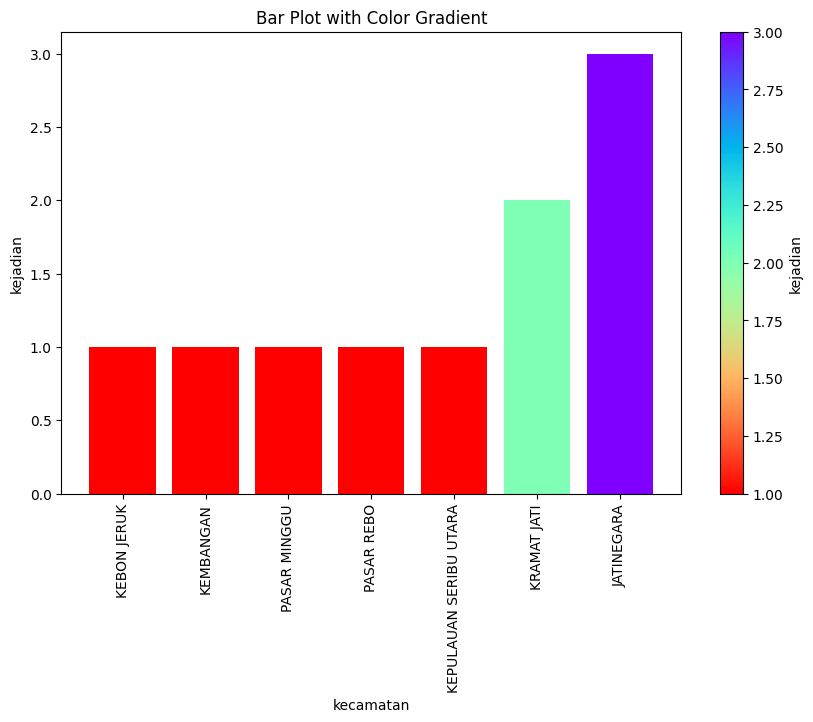

In [21]:
# 0 = januari
# 11 = desember
printBarPlot(kasus_banjir_per_bulan_kecamatan[11])

In [22]:
kasus_banjir_pertahun_kecamatan = dict()
for kasus in kasus_banjir_per_bulan_kecamatan:
    kecam = kasus['kecamatan']
    for kec in kecam:
        try:
            kasus_banjir_pertahun_kecamatan[kec]
        except KeyError:
            kasus_banjir_pertahun_kecamatan[kec] = kasus.loc[kasus['kecamatan'] == kec, 'kejadian'].values[0]
        finally:
            kasus_banjir_pertahun_kecamatan[kec] += kasus.loc[kasus['kecamatan'] == kec, 'kejadian'].values[0]

In [23]:
print(kasus_banjir_pertahun_kecamatan)

{'JOHAR BARU': 5, 'KEMAYORAN': 13, 'SAWAH BESAR': 9, 'TANAH ABANG': 8, 'CILINCING': 22, 'KELAPA GADING': 13, 'KOJA': 3, 'PENJARINGAN': 44, 'PADEMANGAN': 7, 'CENGKARENG': 22, 'GROGOL PETAMBURAN': 9, 'KALIDERES': 17, 'KEBON JERUK': 9, 'KEMBANGAN': 9, 'PALMERAH': 8, 'CILANDAK': 20, 'JAGAKARSA': 12, 'KEBAYORAN BARU': 13, 'KEBAYORAN LAMA': 38, 'MAMPANG PRAPATAN': 23, 'PANCORAN': 26, 'PASAR MINGGU': 25, 'PESANGGRAHAN': 22, 'SETIABUDI': 2, 'TEBET': 21, 'CAKUNG': 22, 'CIPAYUNG': 29, 'CIRACAS': 7, 'DUREN SAWIT': 11, 'JATINEGARA': 67, 'KRAMAT JATI': 48, 'MAKASAR': 46, 'MATRAMAN': 5, 'PASAR REBO': 4, 'PULO GADUNG': 1, 'SENEN': 1, 'MENTENG': 4, 'CEMPAKA PUTIH': 3, 'GAMBIR': 1, 'TANJUNG PRIOK': 2, 'TAMAN SARI': 2, 'TAMBORA': 1, 'KEPULAUAN SERIBU SELATAN': 6, 'KEPULAUAN SERIBU UTARA': 1}
